# Welcome to Web3!

### Blockchain programming using Ethereum and Web3.py

<font size="-1">motivated by <a href="https://snakecharmers.ethereum.org/a-developers-guide-to-ethereum-pt-1/">A Developer's Guide to Ethereum</a> by M. Garreau</font>

In [35]:
# This will update Colab's libraries
#      and will avoid several DeprecationWarnings in the future...

import warnings
warnings.filterwarnings("ignore", category=ImportWarning, append=True)
warnings.filterwarnings("ignore", category=DeprecationWarning, append=True)

# these may need to be repeated, and the append parameter seems suspiciously unintuitive (i.e., not-working)
# this may not be needed
# !pip install --upgrade ipykernel

In [36]:
!pip install web3

In [37]:
!pip install "web3[tester]"

#### Let's check that the libraries are working...



In [38]:
from web3 import Web3

#### Use auto-completion

It's great to quickly review the data and functions in an object...

Add a period at the end of the <tt>Web3</tt> object to see and review its fields:

In [39]:
# Check out whats available in the Web3 object, by
#       typing a period . after Web3 below
#       (make it Web3.  ~ then wait a moment...)

# Here, add a period (the selector operator) and wait a moment
#       a panel should popup to show all of the available fields

# Check out from_wei and to_wei !

Web3.from_wei

<function eth_utils.currency.from_wei(number: int, unit: str) -> Union[int, decimal.Decimal]>

#### Notice <tt>to_wei</tt> and <tt>from_wei</tt>

... and many others!

Here, let's use <tt>to_wei</tt> from the <tt>Web3</tt> object to convert among different units of Ether:

In [40]:
from web3 import Web3

value_in_wei = Web3.to_wei(1, 'ether')
print(f"1 eth is {value_in_wei} wei.")

1 eth is 1000000000000000000 wei.


Here are names for the "coins" of the Ether realm:

<img src="https://m.foolcdn.com/media/dubs/images/gwei-infographic.width-880.png" height="284px">

The nicknames are a mix of computing and cryptography/Ethereum early-explorers...   😀

#### Let's try out the <tt>gwei</tt> unit

Gwei are the typical units for Ethereum's <i>gas</i>

This also shows off the use of <tt>from_wei</tt>

<font size="-1"><i>Warning</i> &nbsp; We will use <i>floating-point</i> for readability. For exact artihmetic, everything must be in integers (and probably in <tt>wei</tt>).</font>

In [41]:
# converting to other units...
#            with the function Web3.from_wei

value_in_gwei = float(Web3.from_wei(42_000_000_000, 'gwei'))
value_in_gwei

# Python allows underscores instead of commas:
# gwei is short for "gigawei" which is 1 billion wei
# Note that, in Python, the underscore is a legal "thousands-separator"  (cool!)

42.0

## <b><font color="DodgerBlue">Challenge #1</font></b> &nbsp;&nbsp; <i>Current</i> currency conversion

<b><font color="Coral">Task</font></b> &nbsp;&nbsp;  Write a function that finds the value, in dollars, of 1 ether and finds the value, in ether and gwei, of 1 dollar. Use the <i>current</i> value of the currencies!

For example, here is how the function might look when it's run:

```
# the call to your function:
your_function()   # choose your own name

# the output, printed:
1 ether is currently  $1342.26

1 dollar is currently .000745012143697942 ether
1 dollar is about     745012.14 gwei
```

#### Remember <tt>requests</tt> ?

<tt>requests</tt> was the Python library our API module used to make API requests to arbitrary endpoints (urls). This is a great way to help implement this function  et's get the current price of ETH...
And use that to convert from dollars to gwei and gwei to dollars...

<br>

#### <i>Use the AI to build-in current ETH pricing...</i>

+ Prompt Colab to use requests API to get the current price of ETH
+ Test the code version(s) it provides to find one that works (and that you like)
+ Continue on, to create your function above...
+ Use better names! For example,  <tt>dollars_to_gwei</tt> or <tt>gwei_to_dollars</tt> would be reasonable helper functions
+ (No requirement for a helper function in this case.)

#### Show that it is working as desired!
+ Run it!
+ <b>Confirm</b> that they are correct by checking the "opposite" results in another cell...

In [42]:
#
# Feel free to create your own cells for this challenge...
#

In [43]:
import requests
import json

def get_eth_price():
    try:
        url = 'https://api.coingecko.com/api/v3/simple/price?ids=ethereum&vs_currencies=usd'
        response = requests.get(url)
        response.raise_for_status()

        data = json.loads(response.text)
        eth_price = data['ethereum']['usd']
        return eth_price
    except requests.exceptions.RequestException as e:
        print(f"Error fetching ETH price: {e}")
        return None
    except (KeyError, json.JSONDecodeError) as e:
        print(f"Error processing ETH price data: {e}")
        return None

def currency_converter():
    eth_price = get_eth_price()
    if eth_price is not None:
        print(f"1 ether is currently ${eth_price:.2f}")

        dollar_to_eth = 1 / eth_price
        print(f"1 dollar is currently {dollar_to_eth} ether")

        dollar_to_gwei = dollar_to_eth * (10**9)
        print(f"1 dollar is about {dollar_to_gwei:.2f} gwei")

currency_converter()


1 ether is currently $1601.82
1 dollar is currently 0.0006242898702725649 ether
1 dollar is about 624289.87 gwei


## <b><font color="DodgerBlue">Challenge #2</font></b> &nbsp;&nbsp; <i>Reflect</i> on the AI code success ...

<b><font color="Coral">Task</font></b> &nbsp;&nbsp;  In developing the above current-currency-conversion function,
+ was the AI able to create the API call you needed?
+ did it format the result as you'd hoped?
+ were there things you had to add to the output code?
+ and - bigger-picture - have you found the Colab AI more helpful as time goes on (or less so?!)

<br>
<hr>
<br>

<font size="-1">Things working too smoothly? <br> Tired of typing/generating the same-old prose answers? <br> Liven up your Colab up with some <font color="DodgerBlue">raw html</font>! <br> Copy the following into a _code_ cell:
```
%%html
<marquee style='width: 30%; color: Coral;'><b>It Works!</b></marquee>
```
</font>

The AI was able to create the API call I needed and successfully output the result I intended to get. I didn't need to do much editing to the outputted code. The Colab AI is pretty helpful!

In [10]:
%%html
<marquee style='width: 30%; color: Coral;'><b>It Works!</b></marquee>

<font color="Coral"><b>task</b></font>

#### Be sure to include at least one cell - of whatever sort - for your AI-success reflection...

<font color="lightgray" size="-2">
Look below for a "cookie clicker" application inside Colab! :)
<font>

<!-- Cookie Clicker (generalized snack version):  
     Copy the code below into a code cell:  


%%html
<head>
  <style>
    button {
      font-size: 2rem;        /*  1 rem is 16 pixels and 12 point */
      padding: 10px 20px;     /*  x padding and y padding         */
    }
  </style>
</head>
<body>
  <button id="snack" onclick="increment()">0</button>
  <script>
    let delta = 1;
    function increment() {
      const btn = document.getElementById('snack');        // our "snack" clicker!
      let count = parseInt(btn.innerText);                 // get the button number
      if (count >= 4.2 || count <= -4.2) { delta *= -1; }  // switch the direction
      btn.innerText = count + delta;                       // update with the current delta
    }
  </script>
</body>
</html>


-->



## Ok!  Let's connect to "the" Ethereum blockchain

+ We will be using the <tt>Web3.py</tt> <i>TesterProvider</i>
+ This is an Ethereum "sandbox" so that we won't have to stake any actual funds
+ Plus, the sandbox blockchain will give us <i>lots</i> of ether!  😃

In [44]:
#
# Here, we create a blockchain-connected Web3 object
#       Web3.EthereumTesterProvider() is our sandbox "provider"
#
# You WILL see some ImportWarnings...   (ignore those; they're Colab, not Ethereum or Web3)

provider = Web3.EthereumTesterProvider()
w3 = Web3(provider)
print("w3 is", w3)

w3 is <web3.main.Web3 object at 0x7f380f2c8a50>


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


#### Are we connected?

In [45]:
w3.is_connected()

True

In [46]:
# Try using the completion panel and <tab> to find w3.eth.accounts ...

w3

In [47]:
# These are the public addresses of the accounts we have

w3.eth.accounts

['0x7E5F4552091A69125d5DfCb7b8C2659029395Bdf',
 '0x2B5AD5c4795c026514f8317c7a215E218DcCD6cF',
 '0x6813Eb9362372EEF6200f3b1dbC3f819671cBA69',
 '0x1efF47bc3a10a45D4B230B5d10E37751FE6AA718',
 '0xe1AB8145F7E55DC933d51a18c793F901A3A0b276',
 '0xE57bFE9F44b819898F47BF37E5AF72a0783e1141',
 '0xd41c057fd1c78805AAC12B0A94a405c0461A6FBb',
 '0xF1F6619B38A98d6De0800F1DefC0a6399eB6d30C',
 '0xF7Edc8FA1eCc32967F827C9043FcAe6ba73afA5c',
 '0x4CCeBa2d7D2B4fdcE4304d3e09a1fea9fbEb1528']

In [48]:
# how many accounts do we have?
len(w3.eth.accounts)

10

#### Nice!

Let's see how much is in one of the accounts, say the one at index 3:

In [49]:
current_account = w3.eth.accounts[3]  # let's use #3

balance_in_wei = w3.eth.get_balance(current_account)

print(f"There are {balance_in_wei} wei in account #3.")

There are 1000000000000000000000000 wei in account #3.


Let's see how big this is as a power of 10. &nbsp;&nbsp; (in floating point)

In [50]:
#
# Let's see it in floating point...

w = float(balance_in_wei)

print(f"There are a total of {w = } wei (in floating point), with 10**18 wei per ETH")

There are a total of w = 1e+24 wei (in floating point), with 10**18 wei per ETH


## <b><font color="DodgerBlue">Challenge #3</font></b> &nbsp;&nbsp; Count your gold! &nbsp; (or ether...)

<b><font color="Coral">Task</font></b> &nbsp;&nbsp;  Use your code from earlier in this notebook -- and any AI help you might want -- to create a new function (you choose the name) that
+ finds the amount of Ether in ***all*** of your accounts
+ adds it all up
+ converts it to dollars
+ prints out the total dollars you have ...
+ and <tt>returns</tt> that value back from the function

<br><br>

In [51]:
#
#  a small example of how to print all account balances
#          feel free to adapt or remove

#  this doesn't quite address the above challenge, but it's a start!

index = 0
for account in w3.eth.accounts:
    balance_in_wei = w3.eth.get_balance(account)
    balance_in_ETH = Web3.from_wei(balance_in_wei, 'ether')
    print(f"Account #{index}  amount: {balance_in_ETH}")
    index += 1

Account #0  amount: 1000000
Account #1  amount: 1000000
Account #2  amount: 1000000
Account #3  amount: 1000000
Account #4  amount: 1000000
Account #5  amount: 1000000
Account #6  amount: 1000000
Account #7  amount: 1000000
Account #8  amount: 1000000
Account #9  amount: 1000000


In [52]:
from decimal import Decimal

def calculate_total_eth_in_dollars(w3, eth_to_usd_rate):
    total_eth = Decimal('0')
    for account in w3.eth.accounts:
        balance_in_wei = w3.eth.get_balance(account)
        balance_in_eth = Web3.from_wei(balance_in_wei, 'ether')
        total_eth += balance_in_eth

    eth_to_usd_rate = Decimal(str(eth_to_usd_rate))
    total_dollars = total_eth * eth_to_usd_rate

    print(f"Total across all accounts: ${total_dollars:,.2f} USD")
    return total_dollars

current_eth_price = get_eth_price()
total_usd = calculate_total_eth_in_dollars(w3, current_eth_price)

Total across all accounts: $16,018,200,000.00 USD


## Let's transact!

First, let's see the latest block in our blockchain...

Then, let's create a single transaction and track its effects...

Then, we'll run a whole marketplace's-worth of transactions!

In [53]:
# sometimes this helps...
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [54]:
#
# Let's see the latest block in our blockchain:

b = w3.eth.get_block('latest')   # this will be the "genesis" block
b

# Notice the number!

AttributeDict({'number': 0,
 'hash': HexBytes('0xf630ebefcaab99fb6f78047b36d1436e738b1203b85f431de2d301f716b8275c'),
 'parentHash': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'nonce': HexBytes('0x0000000000000000'),
 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
 'logsBloom': HexBytes('0x00'),
 'transactionsRoot': HexBytes('0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996cadc001622fb5e363b421'),
 'receiptsRoot': HexBytes('0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996cadc001622fb5e363b421'),
 'stateRoot': HexBytes('0xf1588db9a9f1ed91effabdec31f93cb4212b008c8b8ba047fd55fabebf6fd727'),
 'miner': '0x0000000000000000000000000000000000000000',
 'difficulty': 0,
 'totalDifficulty': 0,
 'mixHash': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'size': 583,
 'extraData': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'gasLimit': 30029122,
 'gasUs

In [55]:
# Let's check the block's number, specifically
# Note that b is a dictionary:

print("Block b's number is ", b['number'])

Block b's number is  0


#### Now, let's try our single, one-time transaction

<i>Warning</i>: &nbsp;&nbsp; If you run this more than once, it will transact more than once!

<font size="-1">This is not really a warning, actually. Try it! 😀</font>

In [56]:
# sometimes this helps with the warnings we don't want:
warnings.filterwarnings("ignore", category=ImportWarning)

In [57]:
#
# Let's create a single transaction:
#       Notice that the transaction is a dictionary
#       It's created, sent to the chain, and a hash is returned:

transaction = {                          # the transaction is a dictionary!
    'from': w3.eth.accounts[3],          # from acct 3
    'to': w3.eth.accounts[8],            # to acct 8
    'value': w3.to_wei(42000, 'ether')   # amount is 42,000 ether!
}

# now, we send the transaction to the blockchain:
tx_hash = w3.eth.send_transaction(transaction)

# let's look at its resulting hash
print("Done!\n")
print(f"The transaction hash is ... {tx_hash = }")

Done!

The transaction hash is ... tx_hash = HexBytes('0x3d3c9ef273414609a1329c3dad2f57bb27f8c5e1cbe143619f29f0137fcea687')


In [58]:
#
# getting the transaction is possible through that transaction hash

# It will return a dictionary of values:
d = w3.eth.get_transaction(tx_hash)
d

AttributeDict({'type': 2,
 'hash': HexBytes('0x3d3c9ef273414609a1329c3dad2f57bb27f8c5e1cbe143619f29f0137fcea687'),
 'nonce': 0,
 'blockHash': HexBytes('0xade4ecce54229751cc6ad49b0b8b2c9b687c4b890404d7ccd3d8f8528b927c26'),
 'blockNumber': 1,
 'transactionIndex': 0,
 'from': '0x1efF47bc3a10a45D4B230B5d10E37751FE6AA718',
 'to': '0xF7Edc8FA1eCc32967F827C9043FcAe6ba73afA5c',
 'value': 42000000000000000000000,
 'gas': 121000,
 'input': HexBytes('0x'),
 'chainId': 131277322940537,
 'accessList': [],
 'maxFeePerGas': 1000000000,
 'maxPriorityFeePerGas': 1000000000,
 'gasPrice': 1000000000,
 'v': 0,
 's': HexBytes('0x51b5d184d4bc6d12ed1d6806cf58287693fe1193d34aa652fe04d74bb0dd2ac9'),
 'r': HexBytes('0xd43cc3b3a8d371fdc9532d1add9e1cc620ee8a50f0a87c25d54c9cf1560e7cc7'),
 'y_parity': 0})

In [60]:
#
# let's get the block number from within those transaction details...

block_number = d['blockNumber']
print(f"{block_number = }")

block_number = 1


In [61]:
#
# Then, let's get that block, from the blocknumber!

b = w3.eth.get_block(block_number)
b

AttributeDict({'number': 1,
 'hash': HexBytes('0xade4ecce54229751cc6ad49b0b8b2c9b687c4b890404d7ccd3d8f8528b927c26'),
 'parentHash': HexBytes('0xf630ebefcaab99fb6f78047b36d1436e738b1203b85f431de2d301f716b8275c'),
 'nonce': HexBytes('0x0000000000000000'),
 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
 'logsBloom': HexBytes('0x00'),
 'transactionsRoot': HexBytes('0x17d3e8d6d3c1eb2134fc842f7c17fef4d1331a2c77f66424dd2fe088939e3ca1'),
 'receiptsRoot': HexBytes('0xf78dfb743fbd92ade140711c8bbc542b5e307f0ab7984eff35d751969fe57efa'),
 'stateRoot': HexBytes('0xa4c270ad3b9e8e8a02a39e034b5e6e0fee6b2f496de6ca6a15d3e1678759f47a'),
 'miner': '0x0000000000000000000000000000000000000000',
 'difficulty': 0,
 'totalDifficulty': 0,
 'mixHash': HexBytes('0x8982a428b2059262b5800b57c3406fc9acf3826ade7a1b5f045acc3641cff847'),
 'size': 714,
 'extraData': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'gasLimit': 30029122,
 'gasUs

In [62]:
#
# Which should be the same as getting the latest block:

b = w3.eth.get_block('latest')
b

AttributeDict({'number': 1,
 'hash': HexBytes('0xade4ecce54229751cc6ad49b0b8b2c9b687c4b890404d7ccd3d8f8528b927c26'),
 'parentHash': HexBytes('0xf630ebefcaab99fb6f78047b36d1436e738b1203b85f431de2d301f716b8275c'),
 'nonce': HexBytes('0x0000000000000000'),
 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
 'logsBloom': HexBytes('0x00'),
 'transactionsRoot': HexBytes('0x17d3e8d6d3c1eb2134fc842f7c17fef4d1331a2c77f66424dd2fe088939e3ca1'),
 'receiptsRoot': HexBytes('0xf78dfb743fbd92ade140711c8bbc542b5e307f0ab7984eff35d751969fe57efa'),
 'stateRoot': HexBytes('0xa4c270ad3b9e8e8a02a39e034b5e6e0fee6b2f496de6ca6a15d3e1678759f47a'),
 'miner': '0x0000000000000000000000000000000000000000',
 'difficulty': 0,
 'totalDifficulty': 0,
 'mixHash': HexBytes('0x8982a428b2059262b5800b57c3406fc9acf3826ade7a1b5f045acc3641cff847'),
 'size': 714,
 'extraData': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'gasLimit': 30029122,
 'gasUs

### Let's see the <font color="DodgerBlue"><b>current amount</b></font> in each of the accounts:

In [63]:
#
#  a small example of how to print all account balances
#                  feel free to adapt or remove!

index = 0
for account in w3.eth.accounts:
    balance_in_wei = w3.eth.get_balance(account)
    balance_in_ETH = Web3.from_wei(balance_in_wei, 'ether')
    print(f"Account #{index}  amount: {balance_in_ETH} ether")
    index += 1


# create total, function, return, ...

Account #0  amount: 1000000 ether
Account #1  amount: 1000000 ether
Account #2  amount: 1000000 ether
Account #3  amount: 957999.999979 ether
Account #4  amount: 1000000 ether
Account #5  amount: 1000000 ether
Account #6  amount: 1000000 ether
Account #7  amount: 1000000 ether
Account #8  amount: 1042000 ether
Account #9  amount: 1000000 ether


### What if we don't have enough currency for the requested transaction?

If a transaction is requested for too-large an amount, the request fails and it is rolled back.

Let's try it:

In [64]:
#
# Let's create a single transaction for TOO MUCH ether
#       Notice that the transaction is a dictionary
#       It's created, sent to the chain, and a hash is returned:

transaction = {                          # the transaction is a dictionary!
    'from': w3.eth.accounts[3],          # from acct 3
    'to': w3.eth.accounts[8],            # to acct 8
    'value': w3.to_wei(42_000_000, 'ether')   # amount is 42 _million_ ether!
}

# now, we send the transaction to the blockchain:
tx_hash = w3.eth.send_transaction(transaction)

# let's look at its resulting hash
print("Done!\n")
tx_hash

ValidationError: Sender does not have enough balance to cover transaction value and gas  (has 957999999979000000000000, needs 42000000000021000000000000)

### A `ValidationError` results!

The transaction does ***not*** succeed.

Any transaction should use `try ... except ...` error-handling blocks in order to catch these potential errors.

Let's see how this will work:

In [65]:
#
# Let's create a single transaction for TOO MUCH ether
#       Notice that the transaction is a dictionary
#       It's created, sent to the chain, and a hash is returned:

from eth_utils import ValidationError

transaction = {                           # the transaction is a dictionary!
    'from': w3.eth.accounts[3],           # from acct 3
    'to': w3.eth.accounts[8],             # to acct 8
    'value': w3.to_wei(42_000, 'ether')   # change this to/from 42 _million_ ether!
}

# now, we send the transaction to the blockchain -- with a TRY/EXCEPT error-handler"
try:
    tx_hash = w3.eth.send_transaction(transaction)
    # let's look at its resulting hash
    print("Success!\n")
    print(f"The {tx_hash = }")
except ValidationError as e:
    print("Transaction failed: Insufficient funds.   This time we've _caught_ this exception. [[ Everything is fine... Nothing to see here... ]] \n")
    print(f"Here is the full ValidationError:\n    {e}")



Success!

The tx_hash = HexBytes('0x80f5636e7ee599c8f4f114c23ac18ebf5529ad9cb3709c750b4d14e949219ce8')


## <b><font color="DodgerBlue">Challenge #4</font></b> &nbsp;&nbsp; A bustling  marketplace...

<b><font color="Coral">Task</font></b> &nbsp;&nbsp;  Use the example, above,  -- and any AI help you might want -- to create functions and cells that
+ run <tt>N</tt> transactions, perhaps once every 2-3 seconds
+ print what's running , e.g., "Account 3 is sending 42,042 ether to Account 8"
+ uses random amounts (you choose the span that's ok)
+ uses random accounts (you choose how to handle this randomness)

<br><br>

<b><font color="Coral">Task 2</font></b> &nbsp;&nbsp;  Run your marketplace a small number of times, e.g., 10 transactions, and print the slate of account values at the end, <i>including the total across all of the accounts</i>.
+ How much gas has been used, across all of the accounts?
+ What are the <i>variance</i> and <i>inequality</i> (as measured by the <i>gini coefficient</i>) across all of the accounts?

<br><br>

<b><font color="Coral">Task 3</font></b> &nbsp;&nbsp;  Run the same marketplace, but now for ***lots*** of transactions. Again, include the resulting account balances, the amount of gas used (total), and the measure of inequality -- which should be the <i>gini inequality</i> or <i>gini coefficient</i>  -- of the result. <br> <font size="-2">How to implement  Gini inequality? Feel free to use AI or [Wikipedia](https://en.wikipedia.org/wiki/Gini_coefficient), which is probably what the AI will have used!</font>

This time, add one more capability to your marketplace:
+ when an account tries to overspend, it spends all it has and then stops spending (it doesn't crash!)
+ one way to do this is to keep a list of the <i>insolvent</i> accounts, starting with the empty list `[ ]`
+ Then, when an account tries to overspend, the transaction will be denied, but it would then go onto the insolvent list -- and will be ignored from then on.
+ equivalently, you could start with a list of <i>solvent</i> accounts and then remove accounts from it when they first try to overspend...

<br><br>

<b><font color="Coral"><u>Finale</u>: &nbsp; The Tontine</font></b> &nbsp;&nbsp;  Run the same marketplace, but now until there is only one account with positive balance...  This time, the questions are slightly different:
+ how many "generations" did it take until one account
+ for each generation, measure and remember the inequality-measure across all 10 accounts (for example, into a list)
+ ***create a plot*** of the balances from the start until the Tontine is won.
+ also, ***create a plot of the Gini inequality/coefficient*** across that time...

You should adapt <i>how much</i> the accounts decide to exchange, so that this is both interesting and not too slow.

<br>

<b><font color="DodgerBlue"><u>Reflection</u></font></b>: &nbsp; **Share your thoughts** on how this programming-and-simulation challenge went -- if you used AI, share how useful (or not) that was. This can be in a new text cell or in comments accompanying your executable cells...

<br><br>
<br><br>

<hr>
<br>

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


Transaction 1: Account 5 sending 42139.20 ETH to Account 9
Transaction 2: Account 8 sending 76139.19 ETH to Account 0
Transaction 3: Account 9 sending 18506.91 ETH to Account 0
Transaction 4: Account 0 sending 43972.42 ETH to Account 6
Transaction 5: Account 6 sending 6198.64 ETH to Account 4
Transaction 6: Account 1 sending 79957.93 ETH to Account 4
Transaction 7: Account 7 sending 52089.00 ETH to Account 4
Transaction 8: Account 7 sending 7147.66 ETH to Account 2
Transaction 9: Account 5 sending 32451.15 ETH to Account 6
Transaction 10: Account 0 sending 74867.14 ETH to Account 9

Final Balances:
Account 0: 975806.55 ETH
Account 1: 920042.07 ETH
Account 2: 1007147.66 ETH
Account 3: 1000000.00 ETH
Account 4: 1138245.56 ETH
Account 5: 925409.65 ETH
Account 6: 1070224.93 ETH
Account 7: 940763.34 ETH
Account 8: 923860.81 ETH
Account 9: 1098499.43 ETH

Total ETH: 10000000.00
Total Gas Used: 210000
Final Gini Coefficient: 0.0413
Transaction 1: Account 5 sending 79732.86 ETH to Account 6
Tr

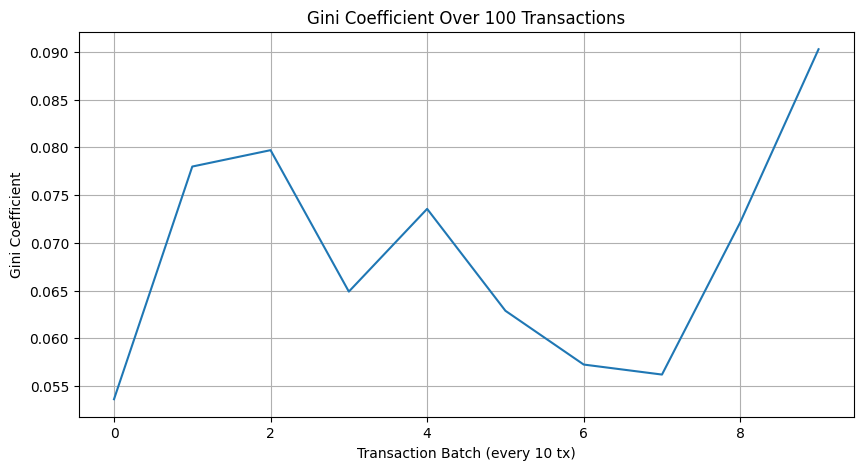

In [66]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from web3 import Web3

provider = Web3.EthereumTesterProvider()
w3 = Web3(provider)

def gini_coefficient(balances):
    balances = np.array(balances)
    n = len(balances)
    if n == 0:
        return 0
    diff_sum = 0
    for i in range(n):
        for j in range(n):
            diff_sum += abs(balances[i] - balances[j])
    return diff_sum / (2 * n * np.sum(balances))


def run_marketplace(num_transactions, delay_seconds=None):
    solvent_accounts = w3.eth.accounts.copy()
    gas_used_total = 0
    gini_history = []

    for i in range(num_transactions):
        if len(solvent_accounts) < 2:
            break

        sender, receiver = random.sample(solvent_accounts, 2)

        sender_balance = w3.eth.get_balance(sender)
        amount = random.randint(1, int(0.1 * sender_balance))

        print(f"Transaction {i+1}: Account {w3.eth.accounts.index(sender)} sending {Web3.from_wei(amount, 'ether'):.2f} ETH to Account {w3.eth.accounts.index(receiver)}")

        try:
            tx_hash = w3.eth.send_transaction({
                'from': sender,
                'to': receiver,
                'value': amount,
                'gas': 21000
            })

            receipt = w3.eth.get_transaction_receipt(tx_hash)
            gas_used_total += receipt['gasUsed']

        except Exception as e:
            print(f"Transaction failed: {e}")
            solvent_accounts.remove(sender)
            continue

        if delay_seconds is not None:
            time.sleep(delay_seconds)

        if i % 10 == 0:
            balances = [w3.eth.get_balance(acc) for acc in w3.eth.accounts]
            gini = gini_coefficient(balances)
            gini_history.append(gini)

    print("\nFinal Balances:")
    total = 0
    balances = []
    for i, account in enumerate(w3.eth.accounts):
        balance = w3.eth.get_balance(account)
        eth_balance = Web3.from_wei(balance, 'ether')
        balances.append(eth_balance)
        total += eth_balance
        print(f"Account {i}: {eth_balance:.2f} ETH")

    print(f"\nTotal ETH: {total:.2f}")
    print(f"Total Gas Used: {gas_used_total}")
    print(f"Final Gini Coefficient: {gini_coefficient(balances):.4f}")

    return gini_history

gini_history_10 = run_marketplace(10, delay_seconds=2)

gini_history_100 = run_marketplace(100, delay_seconds=0.001)

plt.figure(figsize=(10, 5))
plt.plot(gini_history_100)
plt.title("Gini Coefficient Over 100 Transactions")
plt.xlabel("Transaction Batch (every 10 tx)")
plt.ylabel("Gini Coefficient")
plt.grid()
plt.show()


Generation 1 - 10 active accounts
Gini coefficient: 0.3200
Top 3 accounts:
  Account 7: 2274027.02 ETH
  Account 5: 1591964.87 ETH
  Account 8: 1230384.56 ETH

Generation 2 - 10 active accounts
Gini coefficient: 0.4459
Top 3 accounts:
  Account 7: 3084266.55 ETH
  Account 4: 1592013.98 ETH
  Account 5: 1591964.87 ETH

Generation 3 - 10 active accounts
Gini coefficient: 0.4885
Top 3 accounts:
  Account 7: 3361050.59 ETH
  Account 4: 1592013.98 ETH
  Account 5: 1591964.87 ETH

Generation 4 - 10 active accounts
Gini coefficient: 0.4902
Top 3 accounts:
  Account 7: 3370479.47 ETH
  Account 4: 1592013.98 ETH
  Account 5: 1591964.87 ETH

Generation 5 - 10 active accounts
Gini coefficient: 0.4902
Top 3 accounts:
  Account 7: 3370701.35 ETH
  Account 4: 1592013.98 ETH
  Account 5: 1591964.87 ETH

Generation 6 - 10 active accounts
Gini coefficient: 0.4902
Top 3 accounts:
  Account 7: 3370710.34 ETH
  Account 4: 1592013.98 ETH
  Account 5: 1591964.87 ETH

Generation 7 - 10 active accounts
Gini 

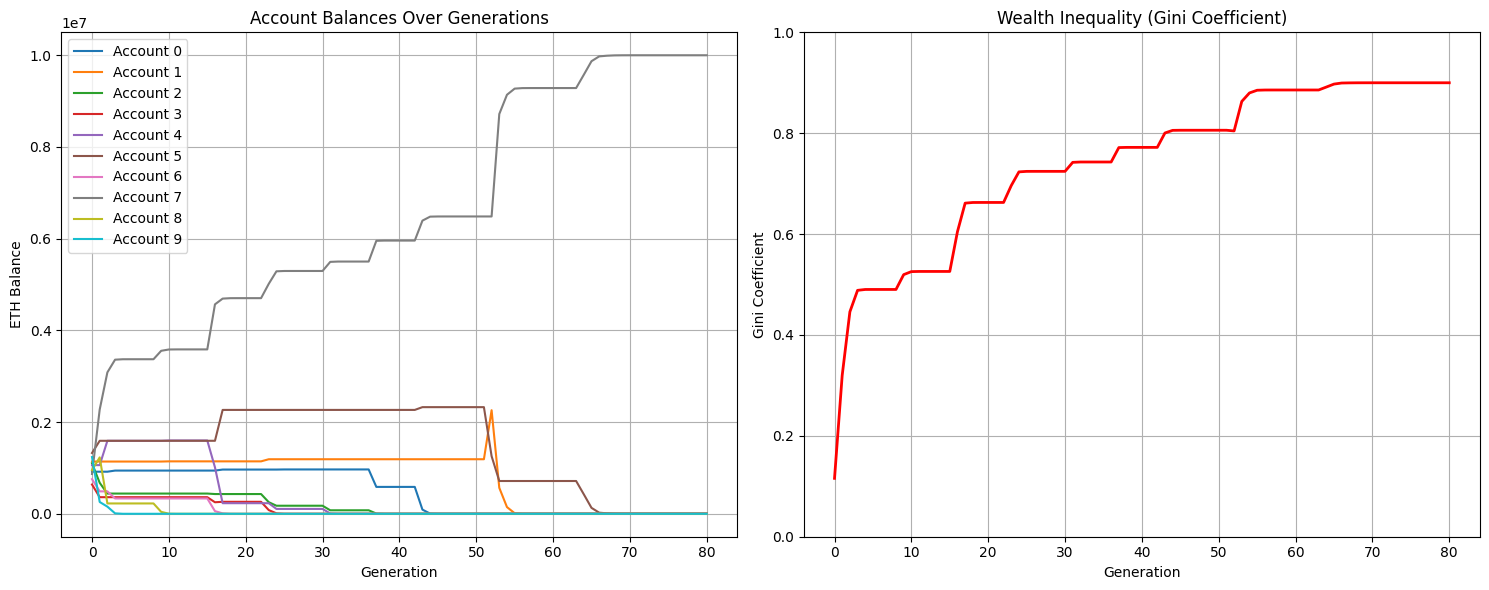

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import random
from web3 import Web3

def gini_coefficient(balances):
    balances = np.array(balances)
    n = len(balances)
    if n == 0 or np.sum(balances) == 0:
        return 0
    diff_sum = 0
    for i in range(n):
        for j in range(n):
            diff_sum += abs(balances[i] - balances[j])
    return diff_sum / (2 * n * np.sum(balances))

def run_tontine_with_metrics():
    accounts = w3.eth.accounts.copy()
    active_accounts = accounts.copy()
    generation = 0

    all_generations = []
    all_balances = []
    all_gini = []

    initial_balances = [w3.eth.get_balance(acc) for acc in accounts]
    all_balances.append(initial_balances)
    all_gini.append(gini_coefficient(initial_balances))

    while len([acc for acc in active_accounts if w3.eth.get_balance(acc) > 0]) > 1:
        generation += 1
        print(f"\nGeneration {generation} - {len(active_accounts)} active accounts")

        for _ in range(min(5, len(active_accounts))):  # Fewer transactions per gen
            if len(active_accounts) < 2:
                break

            balances = {acc: w3.eth.get_balance(acc) for acc in active_accounts}

            send_weights = [1/(balances[acc]+1) for acc in active_accounts]
            sender = random.choices(active_accounts, weights=send_weights, k=1)[0]

            if random.random() > 0.2:
                receiver = max(active_accounts, key=lambda acc: balances[acc])
            else:
                receiver = random.choice([acc for acc in active_accounts if acc != sender])

            current_gini = gini_coefficient(list(balances.values()))
            sender_balance = balances[sender]

            if current_gini > 0.7:
                amount = random.randint(int(0.8 * sender_balance), sender_balance)
            else:
                amount = random.randint(int(0.3 * sender_balance), int(0.7 * sender_balance))

            try:
                tx_hash = w3.eth.send_transaction({
                    'from': sender,
                    'to': receiver,
                    'value': amount,
                    'gas': 21000
                })

                if w3.eth.get_balance(sender) == 0:
                    active_accounts.remove(sender)

            except Exception as e:
                if sender in active_accounts:
                    active_accounts.remove(sender)
                continue

        current_balances = [w3.eth.get_balance(acc) for acc in accounts]
        all_balances.append(current_balances)
        current_gini = gini_coefficient(current_balances)
        all_gini.append(current_gini)
        all_generations.append(generation)

        print(f"Gini coefficient: {current_gini:.4f}")
        print("Top 3 accounts:")
        sorted_accounts = sorted([(i, bal) for i, bal in enumerate(current_balances)],
                                key=lambda x: x[1], reverse=True)[:3]
        for idx, bal in sorted_accounts:
            print(f"  Account {idx}: {Web3.from_wei(bal, 'ether'):.2f} ETH")

    print(f"\n🏆 Tontine completed in {generation} generations!")

    eth_balances = np.array([[Web3.from_wei(b, 'ether') for b in gen] for gen in all_balances])

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    for i in range(len(accounts)):
        plt.plot(range(len(all_balances)), eth_balances[:, i], label=f"Account {i}")
    plt.title("Account Balances Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("ETH Balance")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(range(len(all_gini)), all_gini, 'r-', linewidth=2)
    plt.title("Wealth Inequality (Gini Coefficient)")
    plt.xlabel("Generation")
    plt.ylabel("Gini Coefficient")
    plt.ylim(0, 1)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return generation, all_balances, all_gini

generations, balances, gini_values = run_tontine_with_metrics()

<b><font color="Coral">Hint</font></b> &nbsp;&nbsp; Here is an example of the final cell used for the in-class example. Notice that
+ the function `run_transactions()` does all of the work
+ the two lines above simply "reset" all 10 ETH accounts to 1,000,000 ETH each (wow!)
+ the function `run_transactions()` returns two lists:
  + the list `GiniCoefficients` holds all of those gini coefficients for the whole tontine
  + the line `AllBalances` holds ALL of the balances of all of the accounts for the whole tontine
+ these two were used in order to plot the inequality values and balances...

In [ ]:
# Example of resetting the universe and running the results:
provider = Web3.EthereumTesterProvider()
w3 = Web3(provider)

GiniCoefficients, AllBalances = run_transactions()

Reflection:

I think most of this challenge went pretty smoothly, the last part was a bit more difficult. I did use the help of AI, and it was more useful for simpler tasks and more difficult to work with for more detailed and complex tasks. There was some trial and error with it. It took me a while to get the simulation to run fast.